<a href="https://colab.research.google.com/github/BrajanNieto/n-queens/blob/main/IA_Fundamentals_NQueensProblem_BrajanNieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IA Fundamentals - N Queens Problem**

---



*   The N-Queens problem involves placing N queens on an N×N chessboard such that no two queens can attack each other.

### Application of Hill Climbing and Simulated Annealing in the N-Queens Problem

**Professor:**  
Mg. Machaca Vicente Arceda  
[vicente.machaca.a@gmail.com](mailto:jcaballero@utec.edu.pe)

**Autor:**  
Bach. Brajan Esteban Nieto Espinoza  
[brajan.nieto@utec.edu.pe](mailto:brajan.nieto@utec.edu.pe)

<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

---


**N-Queens Overview**

The N-Queens problem is a classic combinatorial challenge where the objective is to place N queens on an N×N chessboard such that no two queens can attack each other. This means ensuring that no two queens share the same row, column, or diagonal. The problem has been a significant topic in computer science and AI, serving as an example for constraint satisfaction and optimization techniques.

**Algorithms Overview**
* **1. Backtracking (Brute Force):** An algorithm that systematically searches for a solution by exploring all possible configurations and backtracks whenever a configuration fails to meet the conditions. It is used to find solutions that satisfy all constraints.

* **2. Random Search:** An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions. If a placement satisfies all constraints, it is validated.


*   **3. Hill Climbing:** Starts with a random solution and iteratively makes the best local move until no better move is available. Prone to getting stuck in local optima.

*   **4. Simulated Annealing:** Simulates the annealing process in metallurgy. By allowing random moves that may temporarily worsen the solution, it seeks to overcome local optima and find a global solution.

### <b>0. Libraries, Functions for Graphing, etc. </b>

**Libraries**

In [149]:
#Libraries to be used
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

**Fuctions for Graphing**

In [150]:
#Chessboard plottting
def imprimir_tablero_grafico(solucion):
    n = len(solucion)
    tablero = np.zeros((n, n))

    # Place the queens on the board
    for i in range(n):
        tablero[i, solucion[i]] = 1

    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(n+1)-0.5, minor=True)
    ax.set_yticks(np.arange(n+1)-0.5, minor=True)
    ax.grid(which="minor", color="black", linewidth=2)
    ax.tick_params(which="minor", size=0)
    # Draw the chessboard pattern
    ax.imshow([[1 if (i + j) % 2 == 0 else 0 for j in range(n)] for i in range(n)], cmap="gray")

    # Draw the queens
    for i in range(n):
        ax.text(solucion[i], i, '♛', ha='center', va='center', fontsize=30, color='chocolate')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [ ]:
#Plots creation for time comparison
def generar_tabla_y_graficos(df):
    # Configure the plots
    plt.figure(figsize=(15, 5))

    # Plot 1: Total solutions vs N
    plt.subplot(1, 3, 1)
    plt.plot(df['N'], df['Total de soluciones'], marker='o', linestyle='-', color='b')
    plt.title('Total de Soluciones vs N')
    plt.xlabel('N')
    plt.ylabel('Total de soluciones')
    plt.grid(True)

    # Plot 2: Unique solutions vs N
    plt.subplot(1, 3, 2)
    plt.plot(df['N'], df['Soluciones únicas'], marker='s', linestyle='-', color='g')
    plt.title('Soluciones Únicas vs N')
    plt.xlabel('N')
    plt.ylabel('Soluciones únicas')
    plt.grid(True)

    # Plot 3: Execution time vs N
    plt.subplot(1, 3, 3)
    plt.plot(df['N'], df['Tiempo de ejecución (s)'], marker='^', linestyle='-', color='r')
    plt.title('Tiempo de Ejecución vs N')
    plt.xlabel('N')
    plt.ylabel('Tiempo de ejecución (s)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### <b>1.1 Brute Force - All Solutions </b> (Solves the problem by trying all possible arrangements.)

In [151]:
# N-Queens Solver by BackTracking
def solve_n_reinas_backtrack(n):
    soluciones = []
    tablero = [-1] * n

    def es_valido(fila, columna):  # Check if the position is valid
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        if fila == n:
            soluciones.append(tablero.copy()) # Store the solution
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1 # Reset position

    colocar_reina(0)
    return soluciones

In [152]:
# Counting unique solutions based on transformations
def contar_soluciones_unicas(soluciones):
    soluciones_unicas = []
    for solucion in soluciones:
        # Generate all symmetrical transformations of the solution
        transformaciones = generar_transformaciones(solucion)
        # Convert transformations to tuples to store them in a list
        transformaciones_tuplas = [tuple(t) for t in transformaciones]
        # Check if any of the transformations are already in unique solutions
        if not any(t in soluciones_unicas for t in transformaciones_tuplas):
            soluciones_unicas.append(tuple(solucion))
    return len(soluciones_unicas)

# Generate all symmetrical transformations of a solution
def generar_transformaciones(solucion):
    n = len(solucion)
    transformaciones = []
    # Transformation functions
    def rotar_90(sol):
        return [n - 1 - sol.index(i) for i in range(n)]
    def rotar_180(sol):
        return [n - 1 - i for i in sol[::-1]]
    def rotar_270(sol):
        return [sol.index(n - 1 - i) for i in range(n)]
    def reflejar_horizontal(sol):
        return sol[::-1]
    def reflejar_vertical(sol):
        return [n - 1 - i for i in sol]
    def reflejar_diagonal(sol):
        return [sol.index(i) for i in range(n)]
    def reflejar_antidiagonal(sol):
        return [n - 1 - sol.index(n - 1 - i) for i in range(n)]
    # List of all transformations
    transformaciones.append(solucion)
    transformaciones.append(rotar_90(solucion))
    transformaciones.append(rotar_180(solucion))
    transformaciones.append(rotar_270(solucion))
    transformaciones.append(reflejar_horizontal(solucion))
    transformaciones.append(reflejar_vertical(solucion))
    transformaciones.append(reflejar_diagonal(solucion))
    transformaciones.append(reflejar_antidiagonal(solucion))
    return transformaciones

In [155]:
#Testing for 6x6 chessboard
n = 6
soluciones_bt8 = solve_n_reinas_backtrack(n)
soluciones_unicas_bt8 = contar_soluciones_unicas(soluciones_bt8)

print(f"\nSe encontraron {len(soluciones_bt8)} soluciones y {soluciones_unicas_bt8} soluciones únicas para un tablero de tamaño {n}x{n} ")


Se encontraron 4 soluciones y 1 soluciones únicas para un tablero de tamaño 6x6 



Solución 1:


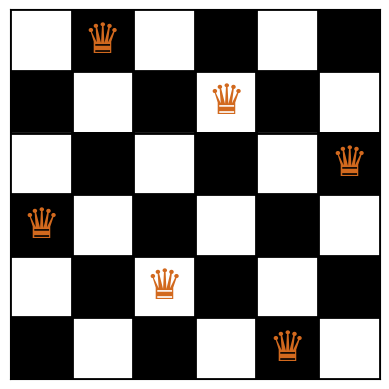


Solución 2:


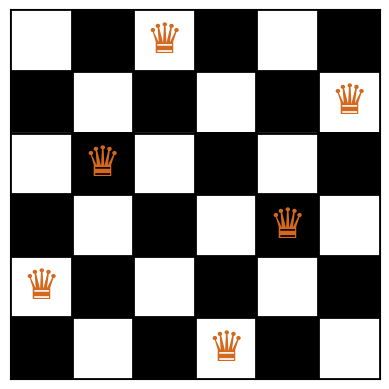


Solución 3:


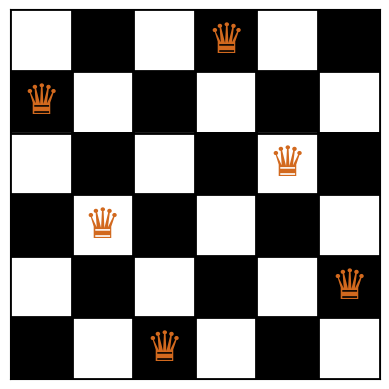


Solución 4:


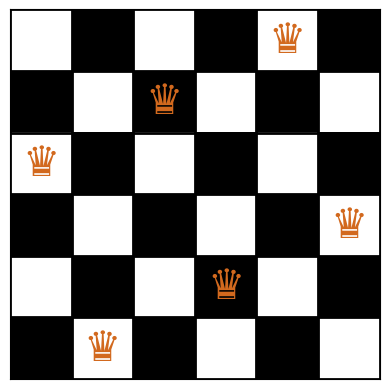

In [156]:
#Print
'''for idx, solucion in enumerate(soluciones):
    print(f"\nSolución {idx + 1}:")
    for i in range(n):
        fila = ['.'] * n
        fila[solucion[i]] = 'Q'
        print(' '.join(fila))'''

for idx, solucion in enumerate(soluciones_bt8):
    print(f"\nSolución {idx + 1}:")
    imprimir_tablero_grafico(solucion)


In [158]:
def tiempo_solucion(n_values):
    # List to store the data
    datos = []

    #print("{:<5} {:<20} {:<20} {:<20}".format('N', 'Total de soluciones', 'Soluciones únicas', 'Tiempo de ejecución (s)'))

    for n in n_values:
        start_time = time.time()
        soluciones = solve_n_queens(n)
        end_time = time.time()

        total_solutions = len(soluciones)
        unique_solutions = contar_soluciones_unicas(soluciones)
        execution_time = end_time - start_time

        #print("{:<5} {:<20} {:<20} {:<20.4f}".format(n, total_solutions, unique_solutions, execution_time))

        # Agregar los datos a la lista
        datos.append({
            'N': n,
            'Total de soluciones': total_solutions,
            'Soluciones únicas': unique_solutions,
            'Tiempo de ejecución (s)': execution_time
        })

    return datos


In [160]:
# Values of N for which you want to calculate the solutions
n_valores = [2, 3, 4, 5, 6, 8, 9, 10, 11,12,13]

# Generate the data
datos_generados = tiempo_solucion(n_valores)

# Create the DataFrame
tiempos_tabla = pd.DataFrame(datos_generados)

# Display the DataFrame
print(tiempos_tabla)


     N  Total de soluciones  Soluciones únicas  Tiempo de ejecución (s)
0    2                    0                  0                 0.000020
1    3                    0                  0                 0.000019
2    4                    2                  1                 0.000063
3    5                   10                  2                 0.000240
4    6                    4                  1                 0.001067
5    8                   92                 12                 0.016079
6    9                  352                 46                 0.069208
7   10                  724                 92                 0.504854
8   11                 2680                341                 3.221523
9   12                14200               1787                14.180901
10  13                73712               9233                85.991909


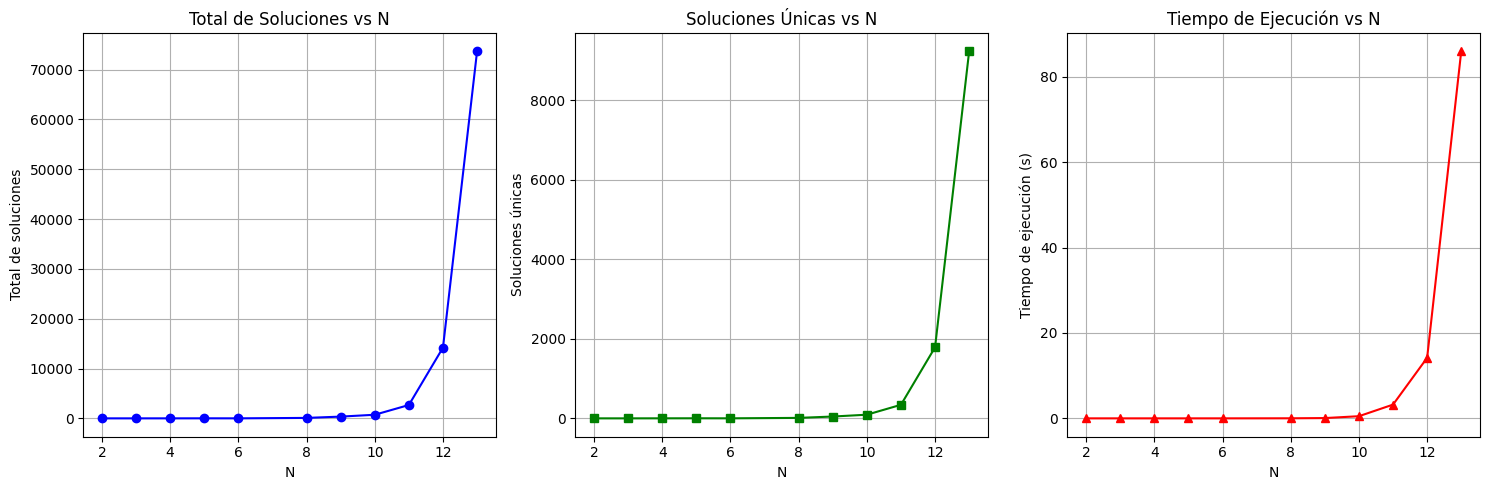

In [161]:
# Create graphs to compare execution times and solutions for different chessboard sizes
generar_tabla_y_graficos(tiempos_tabla)

### <b>1.2 Brute Force - Back Tracking </b> (Solves the problem by trying all possible arrangements until the first valid solution is found.)

In [64]:
#Backtracking (Brute Force): An algorithm that systematically searches for a solution by exploring all configurations in order.
def solve_n_queens_una_solucion(n):
    solucion = []
    tablero = [-1] * n
    encontrado = False

    def es_valido(fila, columna):
        for i in range(fila):
            if (tablero[i] == columna or
                tablero[i] - i == columna - fila or
                tablero[i] + i == columna + fila):
                return False
        return True

    def colocar_reina(fila):
        nonlocal encontrado
        if encontrado:
            return
        if fila == n:
            solucion.extend(tablero.copy())
            encontrado = True
        else:
            for columna in range(n):
                if es_valido(fila, columna):
                    tablero[fila] = columna
                    colocar_reina(fila + 1)
                    tablero[fila] = -1

    colocar_reina(0)
    return solucion if solucion else None


[0, 4, 7, 5, 2, 6, 1, 3]


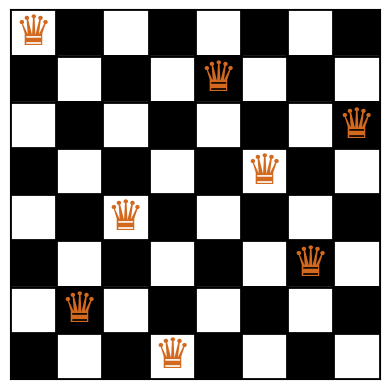

In [178]:
#Testing for 8x8 chessboard
m=8
solucion_bt8 = solve_n_queens_una_solucion(m)
print(solucion_bt8)

imprimir_tablero_grafico(solucion_bt8)

### <b>2. Brute Force - Random Algorithm </b> (An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions.)

In [172]:
#Random Search: An algorithm that searches for a solution by randomly attempting placements and checks if they meet the conditions.
def solve_n_queens_random(n, max_intentos=1000000):
    for _ in range(max_intentos):
        tablero = [random.randint(0, n - 1) for _ in range(n)]
        if es_solucion(tablero):
            return tablero
    return None

def es_solucion(tablero):
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if (tablero[i] == tablero[j] or
                abs(tablero[i] - tablero[j]) == abs(i - j)):
                return False
    return True

[3, 1, 4, 7, 5, 0, 2, 6]


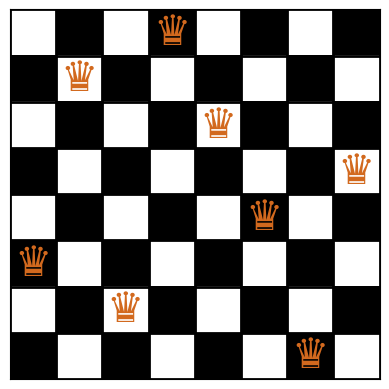

In [179]:
#Testing for 8x8 chessboard
m = 8
solucion_rand8 = solve_n_queens_random(m)
print(solucion_rand8)
imprimir_tablero_grafico(solucion_rand8)


### <b>2. Hill Climbing </b> (Solves the problem by starting with an initial solution and iteratively making the best local change to improve it.)

In [180]:
#Hill Climbing: Starts with a random solution and iteratively makes the best local move until no better move is available.
def heuristica(tablero):
    conflictos = 0
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflictos += 1
    return conflictos

def generate_neighbors(tablero):
    vecinos = []
    n = len(tablero)
    for fila in range(n):
        for columna in range(n):
            if columna != tablero[fila]:
                vecino = tablero.copy()
                vecino[fila] = columna
                vecinos.append(vecino)
    return vecinos

def solve_n_reinas_hill_climbing(n, max_intentos=1000):
    intentos = 0
    while intentos < max_intentos:
        # I Start chessboard
        x = [random.randint(0, n - 1) for _ in range(n)]
        E = heuristica(x)
        mejorado = True

        while mejorado:
            mejorado = False
            vecinos = generate_neighbors(x)
            E_actual = E
            for vecino in vecinos:
                E_vecino = heuristica(vecino)
                if E_vecino < E_actual:
                    x = vecino
                    E_actual = E_vecino
                    mejorado = True
            E = E_actual

            if E == 0:
                print("Solución encontrada en intento", intentos + 1)
                return x  # Solution

        intentos += 1

    print("No se encontró solución después de", intentos, "intentos.")
    return None  # Not found solution

Solución encontrada en intento 1
[3, 7, 4, 2, 0, 6, 1, 5]


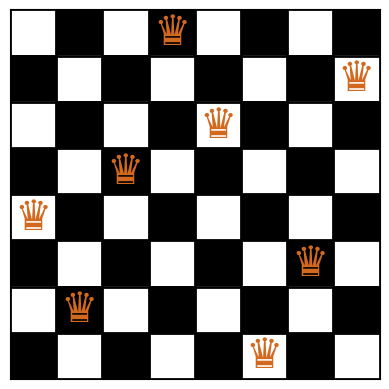

In [181]:
#Testing hill climbing for 8x8 chessboard
m = 8
solucion_hc8 = solve_n_reinas_hill_climbing(m)
print(solucion_hc8)
imprimir_tablero_grafico(solucion_hc8)

In [185]:
#Hill Climbing: Starts with a random solution and iteratively makes the best local move until no better move is available
def heuristica(tablero):
    conflictos = 0
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflictos += 1
    return conflictos

def generate_neighbors(tablero):
    vecinos = []
    n = len(tablero)
    for fila in range(n):
        for columna in range(n):
            if columna != tablero[fila]:
                vecino = tablero.copy()
                vecino[fila] = columna
                vecinos.append(vecino)
    return vecinos

def solve_n_reinas_hill_climbing(n, max_intentos=10):
    intentos = 0
    mejor_solucion = None
    menor_conflicto = float('inf')

    while intentos < max_intentos:
        # Firs random chessboard
        x = [random.randint(0, n - 1) for _ in range(n)]
        E = heuristica(x)
        mejorado = True

        while mejorado:
            mejorado = False
            vecinos = generate_neighbors(x)
            E_actual = E
            for vecino in vecinos:
                E_vecino = heuristica(vecino)
                if E_vecino < E_actual:
                    x = vecino
                    E_actual = E_vecino
                    mejorado = True
            E = E_actual

        # Actualizar mejor solución encontrada
        if E < menor_conflicto:
            menor_conflicto = E
            mejor_solucion = x.copy()

        # Si se encuentra una solución sin conflictos, se retorna inmediatamente
        if E == 0:
            print("Solución encontrada en el intento", intentos + 1)
            return mejor_solucion, menor_conflicto

        intentos += 1

    print("No se encontró solución sin conflictos después de", intentos, "intentos.")
    return mejor_solucion, menor_conflicto  # Retorna la mejor solución encontrada y sus conflictos


Solución encontrada en el intento 8
Mejor solución encontrada: [5, 2, 0, 7, 4, 1, 3, 6]
Conflictos en la mejor solución: 0


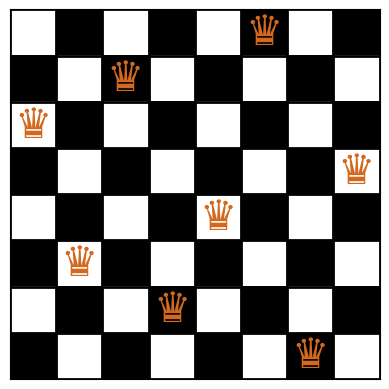

In [194]:
#Testing hill climbing for 8x8 chessboard
m = 8
solucion_hc8, conflictos_hc8 = solve_n_reinas_hill_climbing(m)
print("Mejor solución encontrada:", solucion_hc8)
print("Conflictos en la mejor solución:", conflictos_hc8)
imprimir_tablero_grafico(solucion_hc8)

### <b>3. Simulated Annealing </b> (Solves the problem by exploring solutions and occasionally accepting worse solutions to escape local optima, gradually reducing the probability of such moves over time to find a global solution.t.)

In [189]:
def heuristica(tablero):
    conflictos = 0
    n = len(tablero)
    for i in range(n):
        for j in range(i + 1, n):
            if tablero[i] == tablero[j] or abs(tablero[i] - tablero[j]) == abs(i - j):
                conflictos += 1
    return conflictos

def random_neighbor(tablero):
    n = len(tablero)
    fila = random.randint(0, n - 1)  # Selecciona una fila aleatoria
    columnas = list(range(n))
    columnas.remove(tablero[fila])  # Remueve la columna actual de esa fila
    columna = random.choice(columnas)  # Selecciona una nueva columna para esa reina
    nuevo_tablero = tablero.copy()
    nuevo_tablero[fila] = columna
    return nuevo_tablero

def accept(delta, T):
    if delta < 0:
        return True
    else:
        r = random.uniform(0, 1)
        if r < np.exp(-delta / T):
            return True
        else:
            return False

def solve_n_reinas_simulated_annealing(n, T_max=1000, T_min=1e-5, cooling_rate=0.99, max_intentos=10):
    intentos = 0
    mejor_solucion = None
    menor_conflicto = float('inf')

    while intentos < max_intentos:
        T = T_max
        # Inicializa el tablero con una reina en cada fila, en una columna aleatoria
        x = [random.randint(0, n - 1) for _ in range(n)]
        E = heuristica(x)

        # Actualiza la mejor solución inicial
        if E < menor_conflicto:
            mejor_solucion = x.copy()
            menor_conflicto = E

        while T > T_min:
            x_new = random_neighbor(x)
            E_new = heuristica(x_new)
            delta = E_new - E

            if accept(delta, T):
                x = x_new
                E = E_new

                # Actualiza la mejor solución si es mejor que la anterior
                if E < menor_conflicto:
                    mejor_solucion = x.copy()
                    menor_conflicto = E

            if E == 0:
                print("Solución encontrada en intento", intentos + 1)
                return mejor_solucion, menor_conflicto  # Solución encontrada

            T = T * cooling_rate

        intentos += 1

    print("No se encontró solución sin conflictos después de", intentos, "intentos.")
    return mejor_solucion, menor_conflicto  # Retorna la mejor solución encontrada y sus conflictos

Solución encontrada en intento 1
Mejor solución encontrada: [2, 4, 6, 0, 3, 1, 7, 5]
Conflictos en la mejor solución: 0


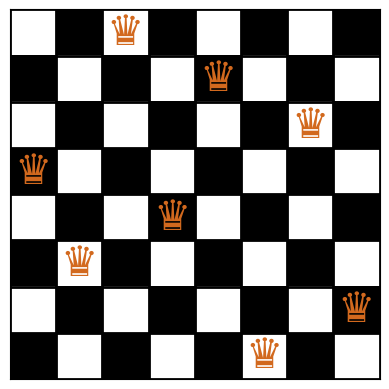

In [195]:
#Testing simulated annealing for 8x8 chessboard
m = 8
solucion_sa8, conflictos_sa8 = solve_n_reinas_simulated_annealing(m)
print("Mejor solución encontrada:", solucion_sa8)
print("Conflictos en la mejor solución:", conflictos_sa8)
imprimir_tablero_grafico(solucion_sa8)